# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url for api calls
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='

# Generate empty lists for response values
date = []

country = []

apilats = []

apilngs = []

ktemp = []

cloudiness = []

humidity = []

windspeed = []



# Initialize city number
citynumber = 1 

# Print the statement indicating the start of processing
print("Retrieving Data")

# Loop through each city in the list
for city in cities:
    
    print(f"Processing record {str(citynumber)} | {city}")
    
    url = base_url + city + '&appid=' + weather_api_key
    response = requests.get(url).json()
    
    try:
        date.append(response['dt'])
        country.append(response['sys']['country'])
        apilats.append(response['coord']['lat'])
        apilngs.append(response['coord']['lon'])
        ktemp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
           
    except KeyError:
        date.append(None)
        country.append(None)
        apilats.append(None)
        apilngs.append(None)
        ktemp.append(None)
        cloudiness.append(None)
        humidity.append(None)
        
    citynumber += 1

    

Retrieving Data
Processing record 1 | puerto princesa
Processing record 2 | port alfred
Processing record 3 | bethel
Processing record 4 | provideniya
Processing record 5 | mataura
Processing record 6 | salym
Processing record 7 | jamestown
Processing record 8 | vila velha
Processing record 9 | luderitz
Processing record 10 | katsuura
Processing record 11 | nikolskoye
Processing record 12 | buhe
Processing record 13 | zlobin
Processing record 14 | mailsi
Processing record 15 | yenagoa
Processing record 16 | hermanus
Processing record 17 | tasiilaq
Processing record 18 | ashoknagar
Processing record 19 | san patricio
Processing record 20 | vesoul
Processing record 21 | bonthe
Processing record 22 | bondo
Processing record 23 | jalu
Processing record 24 | lompoc
Processing record 25 | yumen
Processing record 26 | comodoro rivadavia
Processing record 27 | khatanga
Processing record 28 | khasan
Processing record 29 | chara
Processing record 30 | rikitea
Processing record 31 | sur
Processin

Processing record 250 | castro
Processing record 251 | port-gentil
Processing record 252 | okhotsk
Processing record 253 | wichian buri
Processing record 254 | kununurra
Processing record 255 | isperih
Processing record 256 | fuyu
Processing record 257 | kochevo
Processing record 258 | tuatapere
Processing record 259 | clyde river
Processing record 260 | neuquen
Processing record 261 | faanui
Processing record 262 | jammalamadugu
Processing record 263 | swift current
Processing record 264 | vardo
Processing record 265 | fairbanks
Processing record 266 | kapuskasing
Processing record 267 | port moresby
Processing record 268 | flin flon
Processing record 269 | la brea
Processing record 270 | wanning
Processing record 271 | kawalu
Processing record 272 | necochea
Processing record 273 | xining
Processing record 274 | rumoi
Processing record 275 | teya
Processing record 276 | zhuhai
Processing record 277 | fillan
Processing record 278 | karratha
Processing record 279 | saint-philippe
Proce

Processing record 496 | pudozh
Processing record 497 | tadine
Processing record 498 | kabare
Processing record 499 | saint-pierre
Processing record 500 | mawlaik
Processing record 501 | mehamn
Processing record 502 | santa cruz
Processing record 503 | mahebourg
Processing record 504 | paita
Processing record 505 | vao
Processing record 506 | noyabrsk
Processing record 507 | suoyarvi
Processing record 508 | sorland
Processing record 509 | washington
Processing record 510 | boende
Processing record 511 | chute-aux-outardes
Processing record 512 | mold
Processing record 513 | wangaratta
Processing record 514 | deloraine
Processing record 515 | hambantota
Processing record 516 | vanavara
Processing record 517 | aksarka
Processing record 518 | lata
Processing record 519 | tura
Processing record 520 | villiers
Processing record 521 | izumo
Processing record 522 | santa rosa
Processing record 523 | sambava
Processing record 524 | lerwick
Processing record 525 | port hawkesbury
Processing reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:

# convert kelvin temperatures to fahrenheit
ftemp = []

# 'na' values throw errors, feed 'na' into the new list
for temp in ktemp:
    
    try:
        current = (temp - 273.15) * (5/9) + 32
        ftemp.append(round(current, 2))
    except TypeError:
        ftemp.append(None)

df = pd.DataFrame({'Date': date,
                         'Country': country,
                         'City': cities,
                         'Lat': apilats,
                         'Lng': apilngs,
                         'Max Temp': ftemp,
                         'Cloudiness': cloudiness,
                         'Humidity': humidity})

df

,Date,Country,City,Lat,Lng,Max Temp,Cloudiness,Humidity
0,1.630077e+09,PH,puerto princesa,9.7392,118.7353,46.66,76.0,83.0
1,1.630077e+09,ZA,port alfred,-33.5906,26.8910,39.69,98.0,71.0
2,1.630077e+09,US,bethel,41.3712,-73.4140,49.99,1.0,73.0
3,1.630077e+09,RU,provideniya,64.3833,-173.3000,34.85,100.0,82.0
4,1.630077e+09,NZ,mataura,-46.1927,168.8643,35.54,100.0,98.0
...,...,...,...,...,...,...,...,...
609,1.630077e+09,JP,oyama,36.3000,139.8000,48.68,99.0,74.0
610,1.630077e+09,NO,varhaug,58.6147,5.6457,43.68,87.0,61.0
611,NaN,None,mizpe ramon,NaN,NaN,NaN,NaN,NaN
612,1.630077e+09,RU,lesozavodsk,45.4794,133.4244,41.03,5.0,89.0


In [7]:
df.describe()

,Date,Lat,Lng,Max Temp,Cloudiness,Humidity
count,5.660000e+02,566.000000,566.000000,566.000000,566.000000,566.000000
mean,1.630077e+09,20.873621,22.493351,43.309823,58.171378,69.128975
std,8.536502e+01,34.316401,91.697349,4.829987,38.346311,21.435542
min,1.630076e+09,-54.800000,-175.200000,32.560000,0.000000,6.000000
25%,1.630077e+09,-7.281550,-58.715150,39.577500,20.000000,57.250000
50%,1.630077e+09,25.194000,24.608350,43.830000,75.000000,73.000000
75%,1.630077e+09,51.170575,110.360175,47.087500,97.000000,86.000000
max,1.630077e+09,78.218600,178.416700,54.520000,100.000000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
print ('None')

None


In [9]:
#  Get the indices of cities that have humidity over 100%.
print ('None')

None


In [10]:
print ('none')

none


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

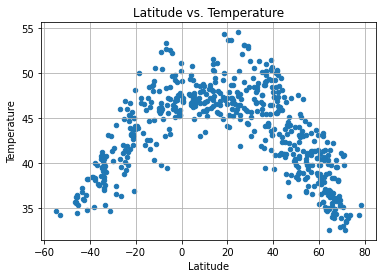

In [39]:
# etablish plot figure
# Use pandas plot function to generate scatter plot with proper labeling
df.plot.scatter(x='Lat', y='Max Temp', xlabel='Latitude', ylabel='Temperature', 
                       title='Latitude vs. Temperature')

# add gridlines
plt.grid()

## Latitude vs. Humidity Plot

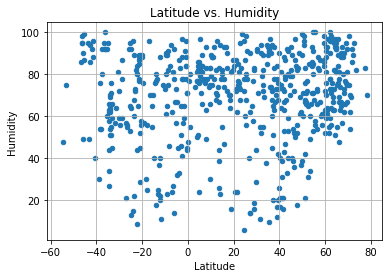

In [40]:
# etablish plot figure
# Use pandas plot function to generate scatter plot with proper labeling
df.plot.scatter(x='Lat', y='Humidity', xlabel='Latitude', ylabel='Humidity', 
                       title='Latitude vs. Humidity')

# add gridlines
plt.grid()

## Latitude vs. Cloudiness Plot

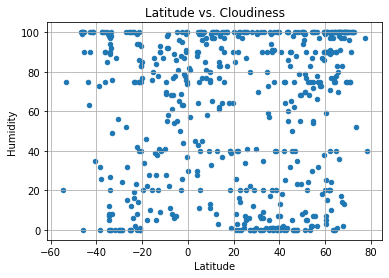

In [41]:
# etablish plot figure
# Use pandas plot function to generate scatter plot with proper labeling
df.plot.scatter(x='Lat', y='Cloudiness', xlabel='Latitude', ylabel='Humidity', 
                       title='Latitude vs. Cloudiness')

# add gridlines
plt.grid()

## Latitude vs. Wind Speed Plot

<Figure size 432x288 with 0 Axes>

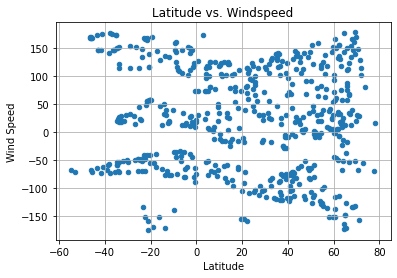

In [42]:
# etablish plot figure
plt.figure()

# Use pandas plot function to generate scatter plot with proper labeling
df.plot.scatter(x='Lat', y='Lng', xlabel='Latitude', ylabel='Wind Speed', 
                       title='Latitude vs. Windspeed')

# add gridlines
plt.grid()

## Linear Regression

In [43]:
# Pull data for cities above and below the equator into separate dataframes
north_df = df.loc[df['Lat'] >= 0]
south_df = df.loc[df['Lat'] < 0]
# print minimum latitude for northern cities and maximum latitude for southern cities to ensure data fits parameters
print (north_df['Lat'].min())
print (south_df['Lat'].max())

0.0487
-0.1934


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

{-0.7795352145849006}


Text(0, 0.5, 'Temperature')

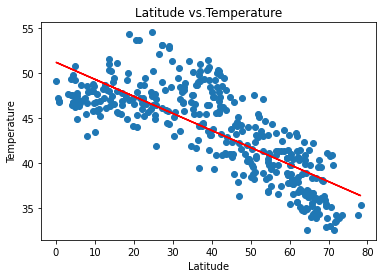

In [49]:
# pull pertinent values into lists to make regression simpler
x_value = north_df['Lat'].tolist()
y_value = north_df['Max Temp'].tolist()
# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
# generate the regression values using the slope-intercept equation
regress = [value * slope + intercept for value in x_value]
# generate the string for regression equation
string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print the r-value of the regression
print({rvalue})

# plot the values and the regression
plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
# add proper plot labels
plt.title('Latitude vs.Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

{0.8359007798118773}


Text(0, 0.5, 'Temperature')

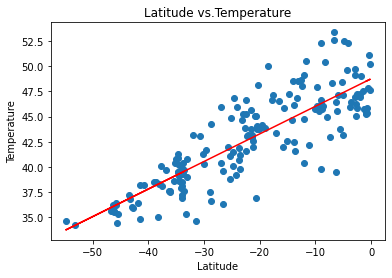

In [50]:
# pull pertinent values into lists to make regression simpler
x_value = south_df['Lat'].tolist()
y_value = south_df['Max Temp'].tolist()
# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
# generate the regression values using the slope-intercept equation
regress = [value * slope + intercept for value in x_value]
# generate the string for regression equation
string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print the r-value of the regression
print({rvalue})

# plot the values and the regression
plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
# add proper plot labels
plt.title('Latitude vs.Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

{0.0777949499639402}


Text(0, 0.5, 'Humidity')

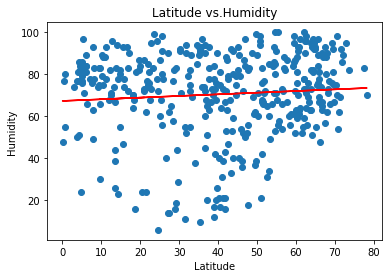

In [51]:
# pull pertinent values into lists to make regression simpler
x_value = north_df['Lat'].tolist()
y_value = north_df['Humidity'].tolist()
# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
# generate the regression values using the slope-intercept equation
regress = [value * slope + intercept for value in x_value]
# generate the string for regression equation
string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print the r-value of the regression
print({rvalue})

# plot the values and the regression
plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
# add proper plot labels
plt.title('Latitude vs.Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

{-0.12705763343300075}


Text(0, 0.5, 'Humidity')

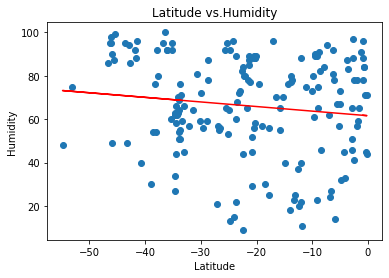

In [52]:
# pull pertinent values into lists to make regression simpler
x_value = south_df['Lat'].tolist()
y_value = south_df['Humidity'].tolist()
# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
# generate the regression values using the slope-intercept equation
regress = [value * slope + intercept for value in x_value]
# generate the string for regression equation
string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print the r-value of the regression
print({rvalue})

# plot the values and the regression
plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
# add proper plot labels
plt.title('Latitude vs.Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

{0.08875860233369302}


Text(0, 0.5, 'Cloudiness')

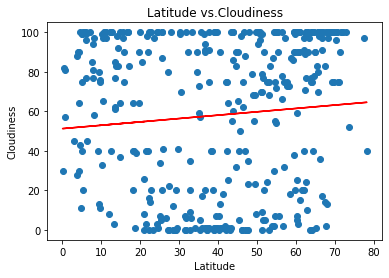

In [53]:
# pull pertinent values into lists to make regression simpler
x_value = north_df['Lat'].tolist()
y_value = north_df['Cloudiness'].tolist()
# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
# generate the regression values using the slope-intercept equation
regress = [value * slope + intercept for value in x_value]
# generate the string for regression equation
string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print the r-value of the regression
print({rvalue})

# plot the values and the regression
plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
# add proper plot labels
plt.title('Latitude vs.Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

{0.011992421294621356}


Text(0, 0.5, 'Cloudiness')

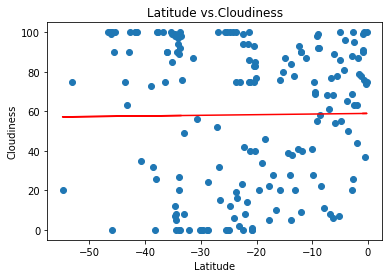

In [54]:
# pull pertinent values into lists to make regression simpler
x_value = south_df['Lat'].tolist()
y_value = south_df['Cloudiness'].tolist()
# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
# generate the regression values using the slope-intercept equation
regress = [value * slope + intercept for value in x_value]
# generate the string for regression equation
string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print the r-value of the regression
print({rvalue})

# plot the values and the regression
plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
# add proper plot labels
plt.title('Latitude vs.Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

{-0.042304815582290746}


Text(0, 0.5, 'Wind Speed')

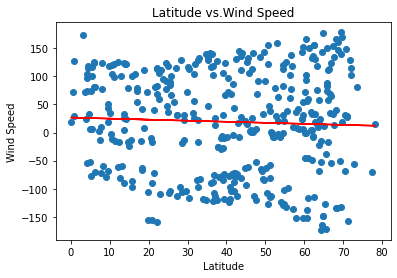

In [57]:
# pull pertinent values into lists to make regression simpler
x_value = north_df['Lat'].tolist()
y_value = north_df['Lng'].tolist()
# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
# generate the regression values using the slope-intercept equation
regress = [value * slope + intercept for value in x_value]
# generate the string for regression equation
string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print the r-value of the regression
print({rvalue})

# plot the values and the regression
plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
# add proper plot labels
plt.title('Latitude vs.Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

{-0.10582105352883724}


Text(0, 0.5, 'Wind Speed')

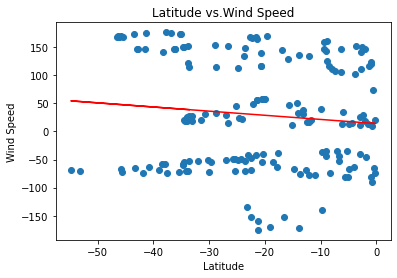

In [58]:
# pull pertinent values into lists to make regression simpler
x_value = south_df['Lat'].tolist()
y_value = south_df['Lng'].tolist()
# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
# generate the regression values using the slope-intercept equation
regress = [value * slope + intercept for value in x_value]
# generate the string for regression equation
string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print the r-value of the regression
print({rvalue})

# plot the values and the regression
plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
# add proper plot labels
plt.title('Latitude vs.Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')